# An?lise do hist?rico de treinamento

Este notebook carrega o arquivo JSON gerado pelo --history-log e plota a evolu??o de loss e acur?cia.

In [2]:
import json
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')


In [4]:
# Atualize para o arquivo desejado
data_path = Path('history_600epc_svm_linear_48k.log')
assert data_path.exists(), f'Arquivo n?o encontrado: {data_path}'


In [5]:
with data_path.open('r', encoding='utf-8') as handle:
    raw_history = json.load(handle)

df = pd.DataFrame(raw_history)
df.head()


,loss,accuracy,epoch,val_loss,val_accuracy
0,6.626382,0.001669,1,6.618412,0.0
1,6.611623,0.003339,2,6.625546,0.0
2,6.596976,0.010017,3,6.632665,0.0
3,6.582568,0.015025,4,6.639700,0.0
4,6.568514,0.016694,5,6.646890,0.0


In [9]:
loss_norm = df['loss']
df["loss_norm"] = (loss_norm - loss_norm.min()) / (loss_norm.max() - loss_norm.min())

loss_norm = df['val_loss']
df["val_loss_norm"] = (loss_norm - loss_norm.min()) / (loss_norm.max() - loss_norm.min())

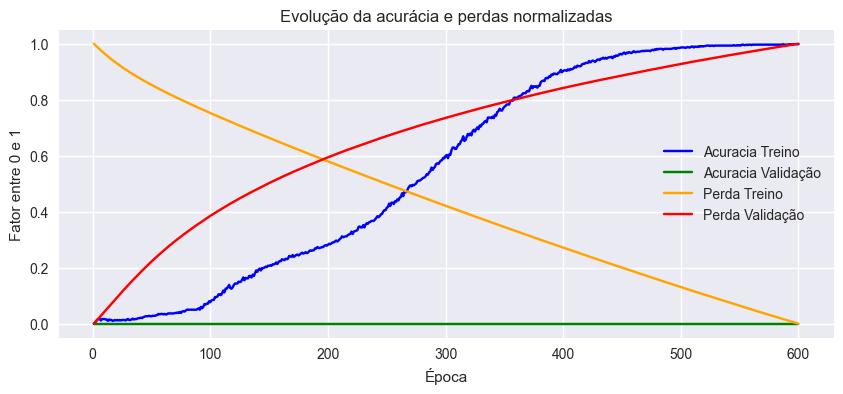

In [11]:
fig, ax = plt.subplots(figsize=(10, 4))
if 'accuracy' in df:
    ax.plot(df['epoch'], df['accuracy'], label='Acuracia Treino', color="blue")
if 'val_accuracy' in df:
    ax.plot(df['epoch'], df['val_accuracy'], label='Acuracia Validação', color="green")
ax.plot(df['epoch'], df['loss_norm'], label='Perda Treino', color="orange")
ax.plot(df['epoch'], df['val_loss_norm'], label='Perda Validação', color="red")
ax.set_xlabel('Época')
ax.set_ylabel('Fator entre 0 e 1')
ax.set_title('Evolução da acurácia e perdas normalizadas')
ax.legend()
ax.grid(True)
plt.show()


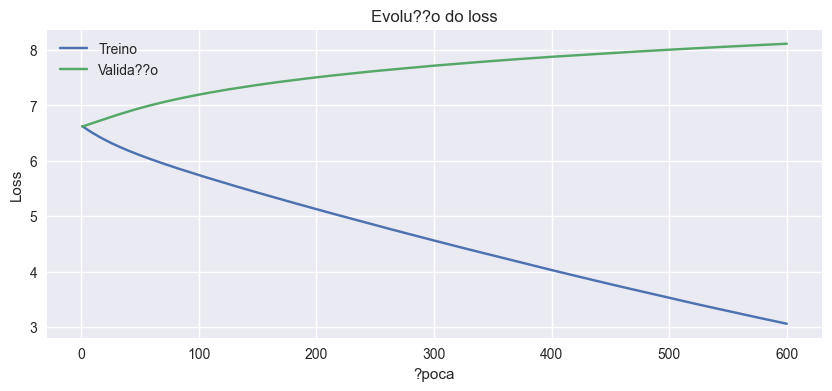

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
if 'loss' in df:
    ax.plot(df['epoch'], df['loss_norm'], label='Treino')
if 'val_loss' in df:
    ax.plot(df['epoch'], df['val_loss_norm'], label='Valida??o')
ax.set_xlabel('?poca')
ax.set_ylabel('Loss')
ax.set_title('Evolu??o do loss')
ax.legend()
ax.grid(True)
plt.show()
